# Devora Lewenstein
Predicting Bike Rentals


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
import math

In [2]:
bike_rentals = pd.read_csv("bike_rental_hour.csv")
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

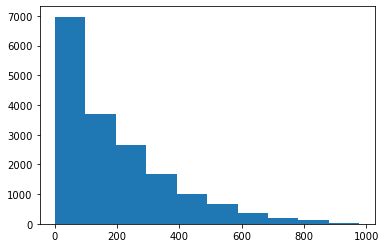

In [3]:
plt.hist(bike_rentals["cnt"])

In [4]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [5]:
def assign_label(value):
    if value >= 6 and value <12:
        return 1
    elif value >=12 and value <18:
        return 2
    elif value >=18 and value <24:
        return 3
    elif value >=0 and value <6:
        return 4
        
bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

In [6]:
bike_rentals

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,3
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,3
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,3
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,3


mse makes the most sense as the columns are mainly numeric columns

In [7]:
train = bike_rentals.sample(frac=.8)

In [8]:
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [9]:
train_target = train['cnt']
test_target =test['cnt']

In [10]:
train = train.drop(['cnt', 'casual', 'dteday', 'registered'], axis=1)
test = test.drop(['cnt', 'casual', 'dteday', 'registered'], axis=1)

In [11]:
columns = list(train.columns)
columns

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [12]:
def rmse_param_model(mod):
    model=mod
    model.fit(train[columns], train_target)
    prediction = model.predict(test[columns])
    mse=np.mean((prediction - test_target) ** 2)
    rmse = math.sqrt(mse)
    print(model.get_params())
    return rmse

def rmse_model(mod):
    model=mod
    model.fit(train[columns], train_target)
    prediction = model.predict(test[columns])
    mse=np.mean((prediction - test_target) ** 2)
    rmse = math.sqrt(mse)
    return rmse

In [13]:
linear_regression=rmse_param_model(LinearRegression())
linear_regression

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


132.68062686185385

The mse is very high.  There data is skewed with some a few extremely high rental counts, which leads to a higher total error.

In [14]:
decision_tree1=rmse_param_model(DecisionTreeRegressor(min_samples_leaf=2))
decision_tree1

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


51.78581251490529

In [15]:
decision_tree2= rmse_param_model(DecisionTreeRegressor(min_samples_leaf=5))
decision_tree2

{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


50.80456501978294

DecisionTreeRegressor does a better job as it takes out the nonlinear predictores into account allowing a higher accuracy

In [16]:
random_forest_rmse1 = rmse_param_model(RandomForestRegressor(min_samples_leaf=5))
random_forest_rmse1

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


44.7708241182126

In [17]:
random_forest_rmse2 = rmse_param_model(RandomForestRegressor(min_samples_leaf=2))
random_forest_rmse2

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


42.385505671412

In [18]:
eta = [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]

for n in range(1,100,10):
    for i in eta:
        accuracies = rmse_model(xgb.XGBRegressor(eta = i, n_estimators = n))
        print (f'ETA: {i} ..... n_estimator {n} ==== rmse: {accuracies}')
    print ('\n________')

ETA: 0.1 ..... n_estimator 1 ==== rmse: 239.76019793094108
ETA: 0.2 ..... n_estimator 1 ==== rmse: 218.27347029706362
ETA: 0.3 ..... n_estimator 1 ==== rmse: 197.41187133049206
ETA: 0.4 ..... n_estimator 1 ==== rmse: 177.39608358115495
ETA: 0.5 ..... n_estimator 1 ==== rmse: 158.54677077979994
ETA: 0.6 ..... n_estimator 1 ==== rmse: 141.3314149526114
ETA: 0.7 ..... n_estimator 1 ==== rmse: 126.41932478839632
ETA: 0.8 ..... n_estimator 1 ==== rmse: 114.71226476422129
ETA: 0.9 ..... n_estimator 1 ==== rmse: 107.26484716289839
ETA: 1 ..... n_estimator 1 ==== rmse: 104.98749573060451

________
ETA: 0.1 ..... n_estimator 11 ==== rmse: 115.60986480523925
ETA: 0.2 ..... n_estimator 11 ==== rmse: 68.5535482295524
ETA: 0.3 ..... n_estimator 11 ==== rmse: 57.419548414960225
ETA: 0.4 ..... n_estimator 11 ==== rmse: 52.08355715009575
ETA: 0.5 ..... n_estimator 11 ==== rmse: 51.2853532191405
ETA: 0.6 ..... n_estimator 11 ==== rmse: 50.186734570545646
ETA: 0.7 ..... n_estimator 11 ==== rmse: 50.8913

In [19]:

for m in range(1,20,3):
    for i in eta:
        accuracies = rmse_model(xgb.XGBRegressor(eta = i, n_estimators = 51, max_depth = m))
      #  overall_accuracies.append(accuracies)
        print (f'ETA: {i} ..... max_depth {m}.... n_estimator 51 ==== rmse: {accuracies}')
    print ('\n________')
#    print ('\n________')

ETA: 0.1 ..... max_depth 1.... n_estimator 51 ==== rmse: 126.33260020438496
ETA: 0.2 ..... max_depth 1.... n_estimator 51 ==== rmse: 115.47232983611282
ETA: 0.3 ..... max_depth 1.... n_estimator 51 ==== rmse: 111.19413283164062
ETA: 0.4 ..... max_depth 1.... n_estimator 51 ==== rmse: 108.97168922426113
ETA: 0.5 ..... max_depth 1.... n_estimator 51 ==== rmse: 107.8337632363218
ETA: 0.6 ..... max_depth 1.... n_estimator 51 ==== rmse: 107.0138752028525
ETA: 0.7 ..... max_depth 1.... n_estimator 51 ==== rmse: 106.14848314103125
ETA: 0.8 ..... max_depth 1.... n_estimator 51 ==== rmse: 106.09838202694888
ETA: 0.9 ..... max_depth 1.... n_estimator 51 ==== rmse: 105.93712697588998
ETA: 1 ..... max_depth 1.... n_estimator 51 ==== rmse: 105.84821639443567

________
ETA: 0.1 ..... max_depth 4.... n_estimator 51 ==== rmse: 66.07200945155569
ETA: 0.2 ..... max_depth 4.... n_estimator 51 ==== rmse: 55.58443464643734
ETA: 0.3 ..... max_depth 4.... n_estimator 51 ==== rmse: 53.75493420298676
ETA: 0.4 

In [20]:
xgb_regressor = rmse_param_model(xgb.XGBRegressor(n_estimators = 51, max_depth = 10))
xgb_regressor

{'objective': 'reg:squarederror', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_delta_step': 0, 'max_depth': 10, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 51, 'n_jobs': 12, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


38.01442643383859